In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('extensive_heroes_information_dataset.csv')
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [7]:
# Let's check the types of the data

df.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [9]:
# Change the name of the 'unnamed: 0' and 'name' columns

df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [12]:
headers = ['Row #', 'Name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

df.columns = headers

df.columns

Index(['Row #', 'Name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [13]:
# Check how the new df looks like with 2 changes to headers

df.head()

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [21]:
# Let's get some basic stats from this data, or at least from the non-object columns

df[['Height', 'Weight']].describe(include = 'all')

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [26]:
# Next, we will check for any missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Row #       734 non-null    int64  
 1   Name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [27]:
df.isnull()

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
729,False,False,False,False,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False,False,False,False,False
731,False,False,False,False,False,False,False,False,False,False,False
732,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df.isnull().sum()

Row #          0
Name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [41]:
# I will separate them by publisher

df_marvel = df.loc[df['Publisher'] == 'Marvel Comics']
df_dc = df.loc[df['Publisher'] == 'DC Comics']
df_dh = df.loc[df['Publisher'] == 'Dark Horse Comics']

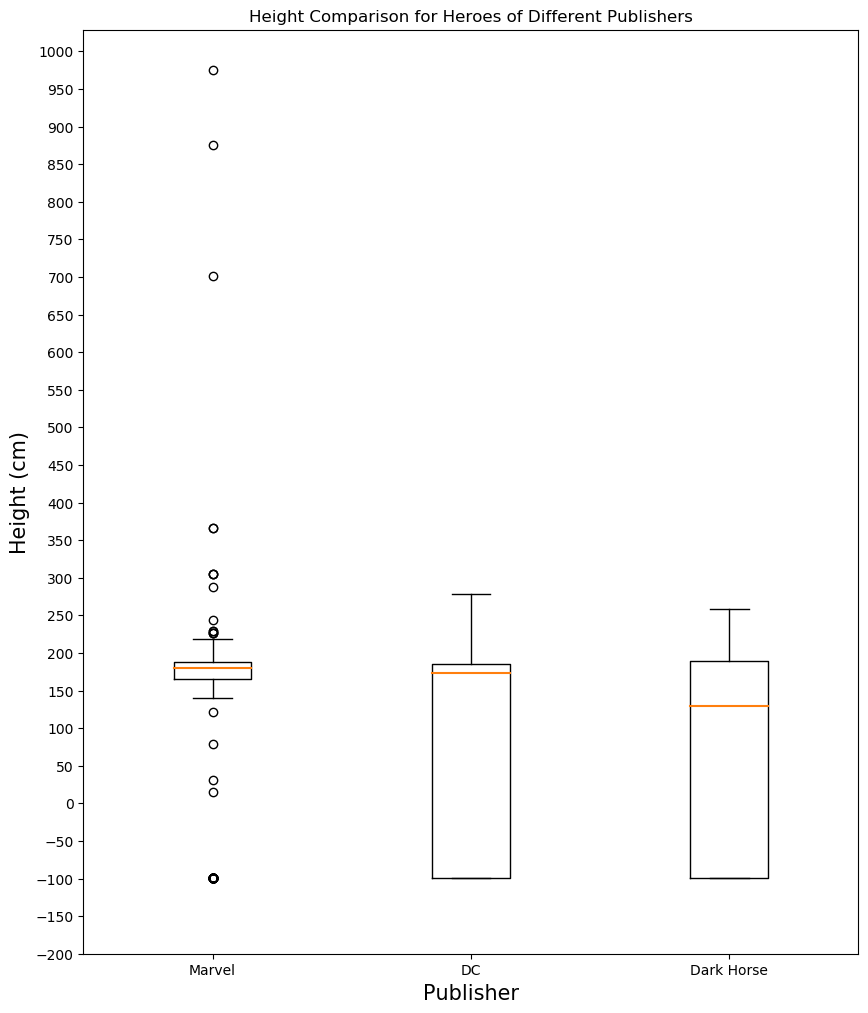

In [66]:
# I want to plot a box and whisker of the height of the heroes in these 3 groups above

df_marvel_height = df_marvel['Height']
df_dc_height = df_dc['Height']
df_dh_height = df_dh['Height']

plt.figure(figsize = (10,12))
plt.title('Height Comparison for Heroes of Different Publishers')
plt.style.use('default')

labels = ['Marvel', 'DC', 'Dark Horse']

plt.boxplot([df_marvel_height, df_dc_height, df_dh_height], labels = labels, medianprops = {'linewidth' : 1.5})
plt.xlabel('Publisher', fontdict = {'fontsize' : 15})
plt.ylabel('Height (cm)', fontdict = {'fontsize' : 15})

plt.yticks(np.arange(-200,1050, 50))


plt.show()

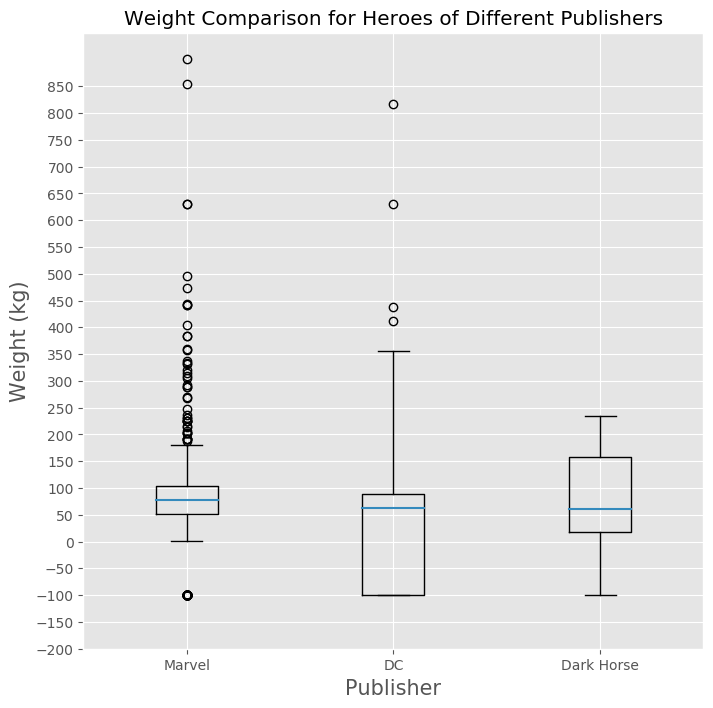

In [69]:
# Box and Whisker for Weight

df_marvel_weight = df_marvel['Weight']
df_dc_weight = df_dc['Weight']
df_dh_weight = df_dh['Weight']

plt.figure(figsize = (8,8))
plt.title('Weight Comparison for Heroes of Different Publishers')
plt.style.use('ggplot')

labels = ['Marvel', 'DC', 'Dark Horse']

plt.boxplot([df_marvel_weight, df_dc_weight, df_dh_weight], labels = labels, medianprops = {'linewidth' : 1.5})
plt.xlabel('Publisher', fontdict = {'fontsize' : 15})
plt.ylabel('Weight (kg)', fontdict = {'fontsize' : 15})

plt.yticks(np.arange(-200, 900, 50))

plt.show()

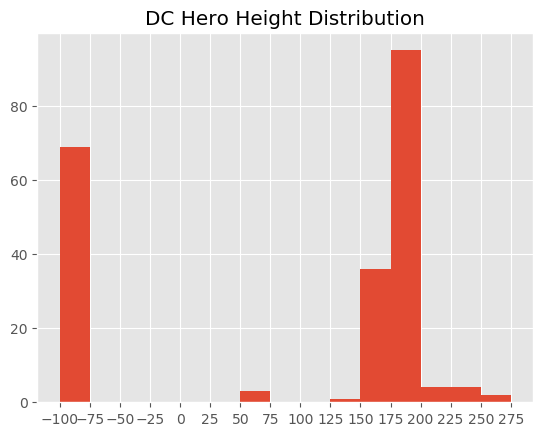

In [73]:
# Even though it probably comes from an error, let's see how the negative data stacks up in terms of distribution
# Let's focus on the data from DC



plt.title('DC Hero Height Distribution')

bins = np.arange(-100, 300, 25)

plt.hist([df_dc_height], bins = bins)

plt.xticks(np.arange(-100,300,25))

plt.show()

In [74]:
# It looks like a lot of heroes might be of height -99cm. This could represent a missing value.
# As a result, let us try to replace the -99 with NaN, to make it clear that they are missing/unknown values